<a href="https://colab.research.google.com/github/HanSong19/PALS0039-Introduction-to-Deep-Learning-for-Speech-and-Language-Processing-/blob/main/Ex_3_1_Keras%20practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![PALS0039 Logo](https://www.phon.ucl.ac.uk/courses/pals0039/images/pals0039logo.png)](https://www.phon.ucl.ac.uk/courses/pals0039/)

#Exercise 3.1 Keras practice

In this exercise we use Keras to build and train a small 4-2-4 [autoencoder](https://en.wikipedia.org/wiki/Autoencoder).

(a) The following code block constructs a simple network with 4 inputs, one hidden layer (with 2 nodes), and 4 outputs. Run the code and add comments to explain what each line does. Is this a regression or classification model? What are the ranges of output values the model is capable of producing?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model                           ## sequential is a multi-layer neutral network
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = Sequential()                                                            ## prepare a neural network (model is empty at this point)
                                                                                ## sequential is multi layered perceotrons (layer after layer and each layer is CONNECTED to previous layer)

model.add(Dense(2, activation='sigmoid', input_shape=(4,), name="hidden_layer"))# model.add: adding layer to the model
                                                                                # (no need to "add" the input layer because I only need input form as in input_shape)
                                                                                # Dense fully connects the current layer to all previous input including weights
                                                                                # the first parameter '2' shows the number of perceptrons (units). The number can change
                                                                                # input_shape: is only needed in the first layer and it stores weightsn (from the second layer, it is automatic)
                                                                                #              (4,) means the input shape is one dementional (a single vector) that has 4 features (inputs)
                                                                                #               video or speech data might have three dementions.              
                                                                                # if needed, more hidden_layers can be added

model.add(Dense(4, activation='sigmoid', name="output_layer"))                  # the output layer has 4 features (perceptrons)

sgd = SGD(learning_rate=0.1, momentum=0.9)                                      # optimiser is stochaic gradient descent, learning rate of 0.1 is fast
                                                                                # momentum takes the precise stop into account
model.compile(loss='mse', optimizer=sgd)                                        # model.compile: finish/conceal the model and the model is ready to run
                                                                                ## the first node has 10 parameters (4 input features) x (2 outputs) + 2 biases
                                                                                ## the second node has 12 parameters (2 input features) x (4 outputs) + 4 biases
                                                                                ## if I do not want/ have specific optimizer, I can just put names e.g., optimizer='Adam'
model.summary()

'''
the model looks like this

input hidden output
x.             x
x.      x.     x
x.      x.     x
x              x

This model reduces the dimension. 4 input to 2 in the hidden layer. why? 
maybe 4 features are too many and see if we can reduce dimensions.
auto encoder is often used to reduce the #of features automatically.

'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 2)                 10        
                                                                 
 output_layer (Dense)        (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


'\nthe model looks like this\n\ninput hidden output\nx.             x\nx.      x.     x\nx.      x.     x\nx              x\n\nThis model reduces the dimension. 4 input to 2 in the hidden layer. why? \nmaybe 4 features are too many and see if we can reduce dimensions.\nauto encoder is often used to reduce the #of features automatically.\n\n'

In [7]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential, Model                           
                                                                                ## if tensorflow is only imported, I need to use it as a=tensor.flow.keras.models.Sequential ()
from tensorflow.keras.layers import Dense                                       ## However, when I import Sequential from tensorflow.keras.models, then I can just call it a=Sequential()
from tensorflow.keras.optimizers import SGD

# Instructions to build the Keras model
def build_model():
  # Variable "model" is of class tensorflow.keras.models.Sequential
  # That class represents neural networks, where one layer is processed after another. (This represents almost all neural networks, but look for skip connections and the ResNet if interested in more powerful architectures. They are used in our application, for example the WaveNet: https://www.deepmind.com/blog/wavenet-a-generative-model-for-raw-audio)
  # The neural network is empty at this point.
  model = Sequential()
  # Class tensorflow.keras.models.Sequential has a function "add" that adds a layer to the network
  # We add the first layer. It is of type Dense, the typical layer in a MLP that is fully connected to the previous layer
  # It has two units. Their activation functions are sigmoids.
  # Because it is the first layer we have to specify the number of inputs. Four inputs for our two nodes lead to 4x2=8 weights, plus 2 bias weights.
  # The name is useful for bigger networks or when we want to copy parts of the network.
  model.add(Dense(2, activation='sigmoid', input_shape=(4,), name="hidden_layer"))
  # We add another layers with 4 nodes. The model already knows that this layer receives inputs from the two nodes of the previous layer.
  # This layer will have 2x4 = 8 weights plus 4 bias weights.
  model.add(Dense(4, activation='sigmoid', name="output_layer"))
  # We create an object for the optimizer, from the class SGD, and we name it "sgd". We give it bigger parameters than the defaul to train faster.
  sgd = SGD(learning_rate=0.1, momentum=0.9)
  # The "compile()" of class tensorflow.keras.models.Sequential actually creates the model and we can start training.
  # We specify the loss function to be the mean squared error and the optimizer.
  # If we wanted to use an optimizer with its default values, we could simply specify it by name, for example optimizer='Adam'
  model.compile(loss='mse', optimizer=sgd)
  return model

# Input data
X = np.array([[1.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])

# Output data
# why predict the same input? X.copy()? Here, we just dimensionality to reduce 4 input features (what if 4 is too many) to 2 (the model automatically)
# chooses 2 feature (in the hidden layer). e.g., in speech data I have so many features that might effect resuls and I want the model to choose relavant features.
Y = X.copy()                                                                      

print("Input\n", X)
print("Output\n", Y)

#(a)
# - Regression
# - [0.0, 1.0] -- Sigmoid activation function

Input
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Output
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:

([[1.0, 0.0, 0.0],
  [0.0, 1.0, 0.0],
  [0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0]])

# If input is this, there are 3 features and 4 training examples and input_shape=(3,)


(b) Complete the code block below to train the model on the data defined above using the model's [`fit` method](https://keras.io/api/models/model_training_apis/#fit-method). Use the specification in the comments to set up the training parameters accordingly.

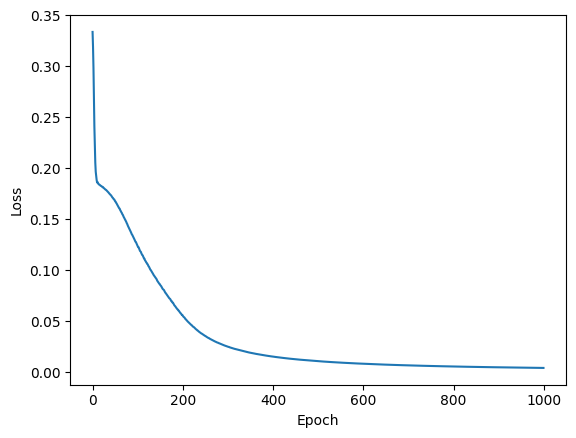

1/1 [==============================] - 0s 46ms/step
[[0.9  0.06 0.   0.05]
 [0.08 0.92 0.06 0.  ]
 [0.   0.07 0.91 0.07]
 [0.09 0.   0.05 0.92]]


In [8]:
# Build the model using the earlier function
# Now my model is created (4 input, 2 hidden, 4 output as designed in the previous cell)
model = build_model()

# Traing the model is done by .predict 
# epoch is one complete training of my training set. (iteration is different from epochp). 
# Iteration is one update of weights, meaning one update of the batch size rather than the entire traiing set)
# the model using 1000 iterations through the dataset with weight updates after processing each individual sample:
# verbose: shows the process, verbose = 0: shows nothing, verbose = 1 shows === process, verbose = 2 shows 1/1000
#(b) train the model and show the history of loss
training = model.fit(X,Y, epochs=1000, batch_size=1, verbose=0)

# Plot the value of the loss function over training
# .history['loss'] shows the training records of 'lose'. I can also search the record of ['accuracy'], ['val_accuacy'] etc.
plt.plot(training.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Print the predicted output values for the training data
# predit the input data (X)
# np.around is used to round floating-point datatypes
prediction = model.predict(X)
print(np.around(prediction, decimals=2), sep="\n")


The following code block displays the network configuration, including number of parameters (weights) that were estimated during training. Furthermore it displays the actual weights and biases of the trained model.

In [9]:
# Print a summary of the structure of the model
model.summary()

# Get the weights as a numpy array
weights=model.get_weights()

# Print the weights for the different layers
# weights are the lists of metrixes
print()
print("hidden-to-input:", weights[0], "", sep="\n")                             ## weights[0] : weight metrix from input to hidden layer
print("hidden-bias:", weights[1], "", sep="\n")                                 ## weights[1] : bias of the hidden layer
print("output-to-hidden:", weights[2], "", sep="\n")                            ## weights[2] : weight metrix from hidden to output
print("output-bias:", weights[3], "", sep="\n")                                 ## weights[3] : bias of the outputlayer

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 2)                 10        
                                                                 
 output_layer (Dense)        (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________

hidden-to-input:
[[ 3.8908165  4.370888 ]
 [ 3.7406151 -2.968778 ]
 [-2.953061  -3.4589205]
 [-3.591783   3.3783433]]

hidden-bias:
[-0.44428313 -0.6471947 ]

output-to-hidden:
[[ 4.5787125  5.5208797 -5.4274707 -5.9353514]
 [ 4.779195  -5.5804725 -5.708236   5.4025216]]

output-bias:
[-6.9245286 -2.7286553  2.5930538 -2.4796472]



(c) Using the sigmoid function defined below, write some code to manually calculate the outputs of the network using the `weights` and `X` as input. **OR** Explain how the weights and biases are used to calculate the networks outputs.

In [ ]:
# definition of the signoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
  
#(c)
#For each training sample:
for i in range(4):
  # Get the input
  input = X[i]
  # Calculate the hidden layer activations
  hidden_activations = sigmoid(np.matmul(input, weights[0]) + weights[1])
  # Get the output layer activations
  output_activations = sigmoid(np.matmul(hidden_activations, weights[2]) + weights[3])
  # Print the input, hidden and output values for this sample
  print(input, np.around(hidden_activations, decimals=2), np.around(output_activations, decimals=2), sep="\t")


[1. 0. 0. 0.]	[0.03 0.97]	[0.92 0.09 0.   0.06]
[0. 1. 0. 0.]	[0.98 0.96]	[0.06 0.89 0.05 0.  ]
[0. 0. 1. 0.]	[0.91 0.02]	[0.   0.09 0.92 0.05]
[0. 0. 0. 1.]	[0.01 0.04]	[0.07 0.   0.07 0.91]


# (d) What are autoencoders useful for?

In [ ]:
#(d)
#https://en.wikipedia.org/wiki/Autoencoder#Applications